In [2]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pydicom
from keras.applications.resnet50 import ResNet50

In [21]:
TRAIN_IMAGES_PATH = "./data/train_images"
TEST_IMAGES_PATH = "./data/test_images"
train_img_names = ['ID_0000aee4b', 'ID_0000ca2f6', 'ID_0000f1657', 
                   'ID_0001dcc25', 'ID_0001de0e8', 'ID_0001f7f62',
                   'ID_00008ce3c', 'ID_000012eaf', 'ID_00025ef4b',
                   'ID_000039fa0', 'ID_000178e76', 'ID_000229f2a',
                   'ID_000230ed7', 'ID_000259ccf', 'ID_0000950d7',
                   'ID_0002003a8', 'ID_0002081b6', 'ID_0002108bd',
                   'ID_00005679d', 'ID_00019828f']

test_img_names = ['ID_000000e27', 'ID_0001af484', 'ID_0001f6d2a',
                  'ID_0002bd10a', 'ID_00007b8cb', 'ID_000176f2a',
                  'ID_000210e16', 'ID_000009146', 'ID_00033386d',
                  'ID_000134952']

train = pd.read_csv("./data/stage_2_train.csv")
train.head()

,ID,Label
0,ID_12cadc6af_epidural,0
1,ID_12cadc6af_intraparenchymal,0
2,ID_12cadc6af_intraventricular,0
3,ID_12cadc6af_subarachnoid,0
4,ID_12cadc6af_subdural,0


In [29]:
test = pd.read_csv('./data/stage_2_sample_submission.csv')
test.head()

,ID,Label
0,ID_0fbf6a978_epidural,0.5
1,ID_0fbf6a978_intraparenchymal,0.5
2,ID_0fbf6a978_intraventricular,0.5
3,ID_0fbf6a978_subarachnoid,0.5
4,ID_0fbf6a978_subdural,0.5


In [8]:
def get_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--input')
    parser.add_argument('--output')
    parser.add_argument('--img-dir')
    return parser.parse_args()
    
def loaddataset(input):
    """
    Read csv file and return dataframe
    """
    return pd.read_csv(input)

def removeduplicates(df, _keep='first', _inplace=True):
    """
    Remove duplicates keeping first row.
    """
    df = df.drop_duplicates(keep=_keep, inplace=_inplace)
    return df

def splitcolumn(df):
    """
    Method read column value and split in multiple columns. This is very much specific to data.
    """
    df['Hemorrhage'] = df['ID'].apply(lambda x : str(x).rsplit('_',1)[1])
    df['ID'] = df['ID'].apply(lambda x : str(x).rsplit('_',1)[0])
    return df

def pivot_dataframe(args, df, column_name, value, indexcolumn):
    """
    This method is used to convert row wise data to column wise.
    column name for which pivoting is required.
    value to keep for pivoted columns
    indexcolumn on which dataframe has to be indexed.
    """
    df = pd.pivot_table(df, columns=column_name, values=value, index=indexcolumn).reset_index()
    df['filepath'] = args.img-dir + df['ID'] + '.dcm'
    return df



In [22]:
train = splitcolumn(train)

,ID,Label,Hemorrhage
0,ID_12cadc6af,0,epidural
1,ID_12cadc6af,0,intraparenchymal
2,ID_12cadc6af,0,intraventricular
3,ID_12cadc6af,0,subarachnoid
4,ID_12cadc6af,0,subdural


In [23]:
removeduplicates(train)
train = train[train["ID"].isin(train_img_names)]

In [41]:
train.head()

,ID,Label,Hemorrhage
256296,ID_000039fa0,0,epidural
256297,ID_000039fa0,0,intraparenchymal
256298,ID_000039fa0,0,intraventricular
256299,ID_000039fa0,0,subarachnoid
256300,ID_000039fa0,0,subdural


In [30]:
test = splitcolumn(test)
removeduplicates(test)
test = test[test["ID"].isin(test_img_names)]
test.head()

,ID,Label,Hemorrhage
17862,ID_0001af484,0.5,epidural
17863,ID_0001af484,0.5,intraparenchymal
17864,ID_0001af484,0.5,intraventricular
17865,ID_0001af484,0.5,subarachnoid
17866,ID_0001af484,0.5,subdural


In [32]:
train.to_csv('./data/train.csv')
test.to_csv('./data/test.csv')

In [42]:
dicom = pydicom.dcmread('./data/train_images/ID_000039fa0.dcm')

In [43]:
dicom

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 188
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.4267.32.162913613590029796866673494045672074853
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_000039fa0
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_eeaf99e7'
(0020, 000d) Study Instance UID                  UI: ID_134d398b61
(0020, 000e) Series Instance UID                 UI: ID_5f8484c3e0
(0020, 0010) Study ID                            SH: '

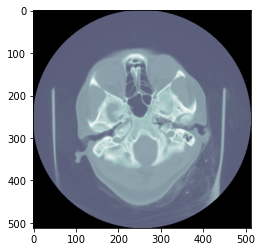

In [46]:
img = dicom.pixel_array
plt.imshow(img, cmap=plt.cm.bone)
plt.show()